# Optimization: finding Rastrigin global minum

In this notebook we will show how to use Auxein to find a global minimum of a function.
In this particular case we will use the 3-dimensional version of the [Rastrigin](https://en.wikipedia.org/wiki/Rastrigin_function) $R(x, y) = z$.

The Rastrigin function is particularly interesting because it is made of several local minum and one global maxium.

So, given the Rastringing function $R(x, y) = z$, our goal will be finding $x$ and $y$ such as $R(x, y) = 0$.

In [91]:
import numpy as np
import logging

logging.getLogger().setLevel(logging.CRITICAL)

As a first thing, let's define the Rastrigin function as below:

In [92]:
def rastrigin(X, A = 10):
    return A*len(X) + sum([(x**2 - A * np.cos(2 * np.pi * x)) for x in X])

Then let's plot the function:

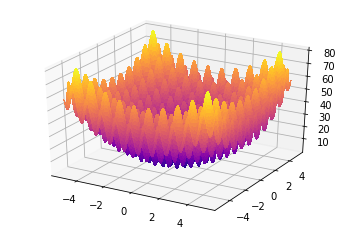

In [93]:
%matplotlib inline  

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import math
import matplotlib.pyplot as plt
import numpy as np



X = np.linspace(-5.12, 5.12, 200)    
Y = np.linspace(-5.12, 5.12, 200)    

X, Y = np.meshgrid(X, Y)

Z = rastrigin([X, Y])

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.plasma, linewidth=0, antialiased=False)    

Then, let's wrap the function with an Auxein [Fitness function](https://github.com/auxein/auxein/blob/master/auxein/fitness/core.py#L15). 

Auxein comes with some pre-defined fitness functions. In our case, given that we want to find the minium of the Rastrin function, we can use the GlobalMinumum fitness function:

In [95]:
from auxein.fitness import GlobalMinumum

ImportError: cannot import name 'GlobalMinumum'

In [36]:
class GlobalMinumum(Fitness):
    
    def __init__(self, kernel):
        super().__init__()
        self.kernel = kernel
    
    def fitness(self, individual) -> float:
        dna = individual.genotype.dna
        return -1 * self.kernel(dna)
    
    def value(self, individual, x):
        pass

fitness_function = GlobalMinumum(rastrigin)

In [80]:
from auxein.population.dna_builders import NormalRandomDnaBuilder
from auxein.population import build_fixed_dimension_population
population = build_fixed_dimension_population(2, 100, fitness_function, NormalRandomDnaBuilder(0, 4))

In [81]:
from auxein.playgrounds import Static
from auxein.mutations import SelfAdaptiveSingleStep
from auxein.recombinations import SimpleArithmetic
from auxein.parents.distributions import SigmaScaling
from auxein.parents.selections import StochasticUniversalSampling
from auxein.replacements import ReplaceWorst

In [82]:
offspring_size = 2
playground = Static(
    population = population,
    fitness = fitness_function,
    mutation = SelfAdaptiveSingleStep(0.5),
    distribution = SigmaScaling(),
    selection = StochasticUniversalSampling(offspring_size = offspring_size),
    recombination = SimpleArithmetic(alpha = 0.5),
    replacement = ReplaceWorst(offspring_size = offspring_size)
)

In [84]:
stats = playground.train(250)

INFO:root:Starting evolution cycle with a maximum of 250 generations
DEBUG:root:100/250 -- average_fitness: -13.639063453061341
DEBUG:root:101/250 -- average_fitness: -13.470418719728766
DEBUG:root:102/250 -- average_fitness: -13.7637819926146
DEBUG:root:103/250 -- average_fitness: -14.490553874281426
DEBUG:root:104/250 -- average_fitness: -13.299448144771857
DEBUG:root:105/250 -- average_fitness: -13.392369801600848
DEBUG:root:106/250 -- average_fitness: -13.23292691364673
DEBUG:root:107/250 -- average_fitness: -13.05683118882933
DEBUG:root:108/250 -- average_fitness: -12.913898280402409
DEBUG:root:109/250 -- average_fitness: -13.04668219003292
DEBUG:root:110/250 -- average_fitness: -12.856885750061393
DEBUG:root:111/250 -- average_fitness: -12.918276630897326
DEBUG:root:112/250 -- average_fitness: -13.11193926413991
DEBUG:root:113/250 -- average_fitness: -13.124758011575928
DEBUG:root:114/250 -- average_fitness: -12.628685628820621
DEBUG:root:115/250 -- average_fitness: -12.497260487

DEBUG:root:240/250 -- average_fitness: -7.66795744537728
DEBUG:root:241/250 -- average_fitness: -7.327692590723306
DEBUG:root:242/250 -- average_fitness: -7.4964068718659975
DEBUG:root:243/250 -- average_fitness: -7.5088577906657825
DEBUG:root:244/250 -- average_fitness: -7.441158129376667
DEBUG:root:245/250 -- average_fitness: -7.146089335737995
DEBUG:root:246/250 -- average_fitness: -7.279969752383871
DEBUG:root:247/250 -- average_fitness: -7.238981216566989
DEBUG:root:248/250 -- average_fitness: -7.436848320753834
DEBUG:root:249/250 -- average_fitness: -7.473134552278106
INFO:root:Training ended with average_fitness: -7.175925680803913


In [61]:
[a, b] = playground.get_most_performant().genotype.dna

In [62]:
a

0.0970848119855513

In [63]:
b

-0.005646122668467091

In [64]:
rastrigin([a, b])

1.8192797839475467